In [8]:
import string
import numpy
import pandas

def only_alpha(str):
    input_char = ""
    for char in str:
        if char.isalpha():
            input_char += char
    return input_char

def permutation(str,n,dict):
    for i in range(len(only_alpha(str))-1):
        if only_alpha(str)[i:i+2] not in dict:
            dict[only_alpha(str)[i:i+2]] = n
            continue
        dict[only_alpha(str)[i:i+2]] += n

In [9]:
count = {}
# Students
permutation("B → F → B → Q → T → Q → M → B", 300, count)
permutation("A → V → A → T → A → F → A", 300, count)
permutation("B → W → L → T → B → N → B", 500, count)
permutation("B → T → B → F → B → I → B", 50, count)
permutation("A → F → K → T → A → V → A", 100, count)

permutation("B → T → W → B → L → B", 10, count)
permutation("B → L → T → B → L → W → B → R → M → O → B", 200, count)
permutation("A → T → A → V → A → G → N → O → A", 150, count)
permutation("B → G → N → B → T → Q → B", 50, count)
permutation("A → L → G → W → A → T → A → O → A", 90, count)

In [10]:
uplt = string.ascii_uppercase[:20] + string.ascii_uppercase[21:23]

count_matrix = numpy.zeros((22,22))
tf_matrix = numpy.zeros((22,22))

for letter1 in uplt:
    for letter2 in uplt:
        if letter1+letter2 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter1+letter2]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
        if letter2+letter1 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter2+letter1]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
count_matrix

count_matrix_0_1 = count_matrix/count_matrix.max()

# Degree
# 0.2 and 0.4 ... are not actual numbers, just for convenience
count_matrix_degree = pandas.cut(count_matrix_0_1.flatten(), bins=4, labels=[0.2,0.4,0.6,0.8])
count_matrix_degree_matrix = numpy.asarray(count_matrix_degree).reshape((22,22)).tolist()

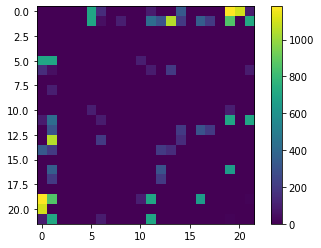

In [11]:
import matplotlib.pyplot as plt
plt.imshow(count_matrix)
plt.colorbar()
plt.show()

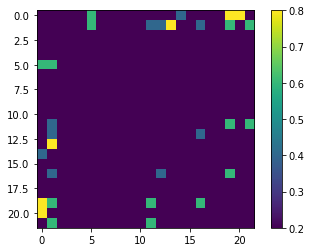

In [12]:
plt.imshow(count_matrix_degree_matrix)
plt.colorbar()
plt.show()

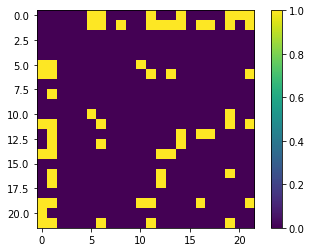

In [13]:
plt.imshow(tf_matrix)
plt.colorbar()
plt.show()

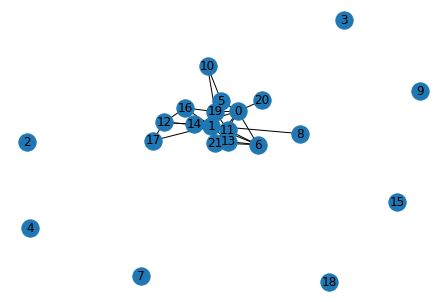

In [14]:
import networkx as nx
G = nx.from_numpy_matrix(count_matrix_0_1)
nx.draw(G, with_labels=True)